<a href="https://colab.research.google.com/github/ravishanilneth/Early-Detection-of-Alzheimer-s-Disease-Using-Explainable-AI-Powered-Deep-Learning/blob/main/ML_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Necessary Libraries**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# **Data Preprocessing**

In [ ]:
# Load the dataset
data = pd.read_csv('/content/oasis_cross-sectional.csv')

In [ ]:
# Drop unnecessary columns
data.drop(['ID', 'Hand', 'Delay', 'CDR', 'eTIV', 'ASF', 'M/F', 'SES'], axis=1, inplace=True)

In [ ]:
# Define features and target variable
X = ['Age', 'Educ', 'MMSE', 'nWBV']
y = data['Group']

In [ ]:
# Define categories for the target variable
target_categories = ['Non Demented', 'Very Mild Dementia', 'Mild Dementia', 'Moderate Dementia']

In [ ]:
# Drop rows where 'Group' is NaN
data.dropna(subset=['Group'], inplace=True)

# Fill missing values of MMSE with the median
data['MMSE'].fillna(data['MMSE'].mode()[0], inplace=True)

# Fill missing values of Educ with the mode
data['Educ'].fillna(data['Educ'].mode()[0], inplace=True)

In [ ]:
# Encode the target variable
label_encoder = LabelEncoder()
# Fit the encoder on the unique values in your target column, handling NaNs
label_encoder.fit(y.unique())
y_encoded = label_encoder.transform(y)

In [ ]:
# Define columns
categorical_columns = 'Educ'
continuous_columns = 'MMSE'

# Label Encoding for categorical column
label_encoder = LabelEncoder()
data[categorical_columns] = label_encoder.fit_transform(data[categorical_columns].astype(str))

# Normalization for continuous column
scaler = MinMaxScaler()
data[continuous_columns] = scaler.fit_transform(data[[continuous_columns]])

In [ ]:
# Oversample the minority classes using SMOTE
smote = SMOTE(k_neighbors=1)
X_resampled, y_resampled = smote.fit_resample(X, y_encoded)

In [ ]:
# Split the resampled dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# **Model Building and Training**

In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

# Build SVM model
svm_classifier = SVC(
    kernel='rbf',
    gamma=0.1,
    C=1.0,
    class_weight='balanced')
pipeline_svm = Pipeline([
    ('classifier', svm_classifier)
])
pipeline_svm.fit(X_train, y_train)

Pipeline(steps=[('classifier', SVC())])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

# Build Random Forest model
rf_classifier = RandomForestClassifier(
    n_estimators=150,
    max_features='sqrt',
    max_depth=12,
    random_state=42,
    class_weight='balanced'
)
pipeline_rf = Pipeline([
    ('classifier', rf_classifier)
])
rf_classifier.fit(X_train, y_train)

Pipeline(steps=[('classifier', RandomForestClassifier(random_state=42))])

In [ ]:
# Assuming y_train is your training labels (e.g., 0 for negative, 1 for positive)

# Count the number of samples for each class
from collections import Counter

class_counts = Counter(y_train)
num_negative = class_counts[0]  # Replace 0 with the label for the negative class
num_positive = class_counts[1]  # Replace 1 with the label for the positive class

# Calculate the imbalance ratio
scale_pos_weight = num_negative / num_positive

print(f"Number of Negative Samples: {num_negative}")
print(f"Number of Positive Samples: {num_positive}")
print(f"Imbalance Ratio (scale_pos_weight): {scale_pos_weight}")

In [ ]:
import xgboost as xgb
from sklearn.pipeline import Pipeline

# Build XGBoost model
xgb_classifier = xgb.XGBClassifier(
    scale_pos_weight=13,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8
)
pipeline_xgb = Pipeline([
    ('classifier', xgb_classifier)
])
pipeline_xgb.fit(X_train, y_train)

Pipeline(steps=[('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric='mlogloss',
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=1000, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

# **Model Evaluation and Comparison**

In [ ]:
# Make predictions for SVM
y_pred_svm = pipeline_svm.predict(X_test)

# Make predictions for Random Forest
y_pred_rf = pipeline_rf.predict(X_test)

# Make predictions for XGBoost
y_pred_xgb = pipeline_xgb.predict(X_test)

# Calculate classification reports for each model
report_svm = classification_report(y_test, y_pred_svm, target_names=target_categories, labels=label_encoder.transform(target_categories), output_dict=True)
report_rf = classification_report(y_test, y_pred_rf, target_names=target_categories, labels=label_encoder.transform(target_categories), output_dict=True)
report_xgb = classification_report(y_test, y_pred_xgb, target_names=target_categories, labels=label_encoder.transform(target_categories), output_dict=True)

In [ ]:
# Calculate accuracy for SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)

# Calculate accuracy for Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Calculate accuracy for XGBoost
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

In [ ]:
# Create a DataFrame to store the metrics
metrics_df = pd.DataFrame({
    'Model': ['SVM', 'Random Forest', 'XGBoost'],
    'Accuracy': [accuracy_svm, accuracy_rf, accuracy_xgb],
    'Precision': [report_svm['weighted avg']['precision'], report_rf['weighted avg']['precision'], report_xgb['weighted avg']['precision']],
    'Recall': [report_svm['weighted avg']['recall'], report_rf['weighted avg']['recall'], report_xgb['weighted avg']['recall']],
    'F1 Score': [report_svm['weighted avg']['f1-score'], report_rf['weighted avg']['f1-score'], report_xgb['weighted avg']['f1-score']]
})

# Display the metrics DataFrame
print(metrics_df)

           Model  Accuracy  Precision    Recall  F1 Score
0            SVM  0.842593   0.854602  0.842593  0.845787
1  Random Forest  0.907407   0.914815  0.907407  0.908670
2        XGBoost  0.888889   0.891022  0.888889  0.889567


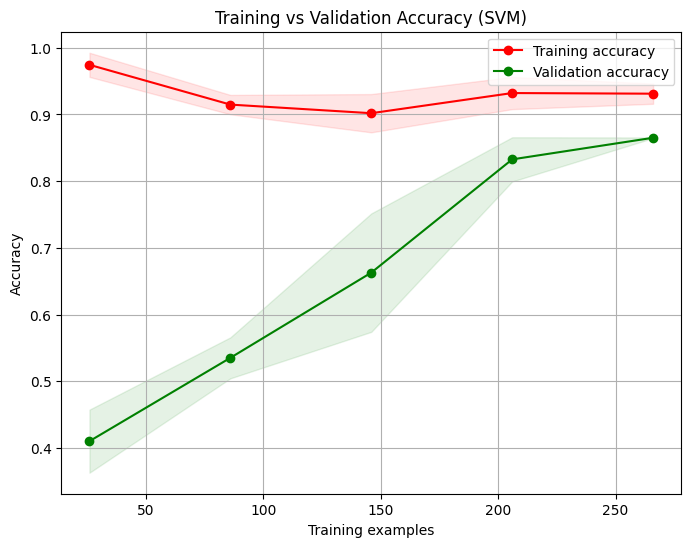

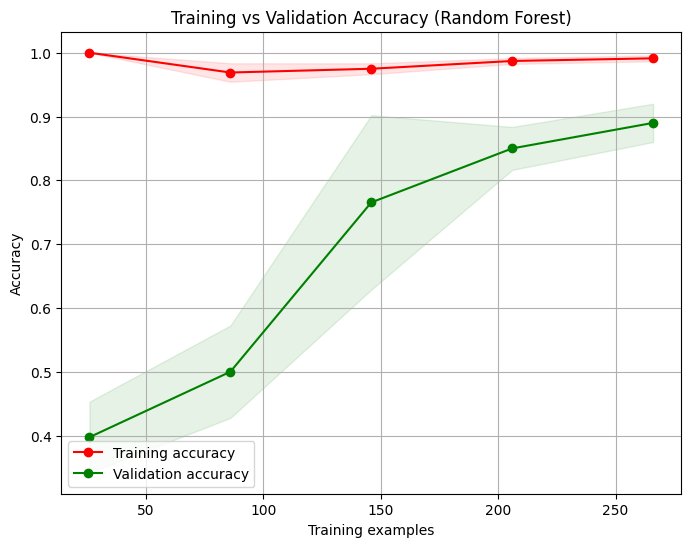

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
6 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/xgboost/core.py", line 726, in inner_f
    return func(**kwargs)
  File "/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py", line 1491, in fit
    raise ValueError(
ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1], got [2 3]

---

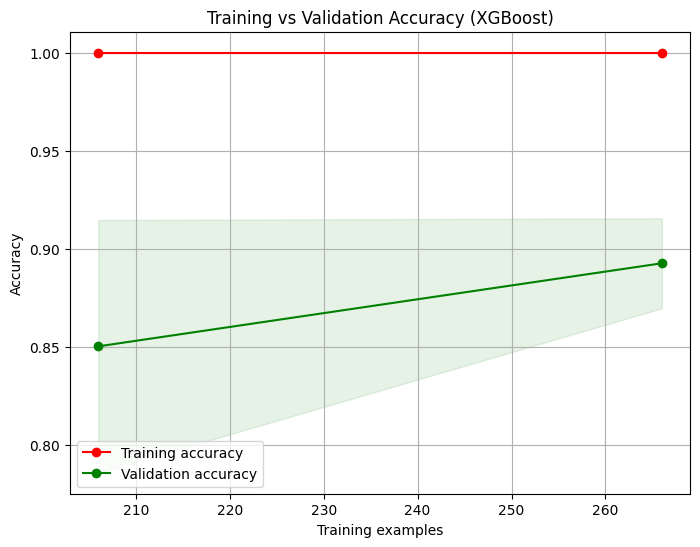

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import numpy as np

# Function to plot training vs validation accuracy
def plot_accuracy_curve(estimator, title, X, y, cv=None, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5)):
    plt.figure(figsize=(8, 6))
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Accuracy")

    # Calculate learning curve
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='accuracy'
    )

    # Calculate mean and std for training and test scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot accuracy curve
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training accuracy")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Validation accuracy")

    plt.legend(loc="best")
    plt.show()

# Example: Accuracy Curve for SVM
plot_accuracy_curve(grid_svm.best_estimator_, "Training vs Validation Accuracy (SVM)", X_resampled, y_resampled, cv=3)

# Example: Accuracy Curve for Random Forest
plot_accuracy_curve(best_rf_model, "Training vs Validation Accuracy (Random Forest)", X_resampled, y_resampled, cv=3)

# Example: Accuracy Curve for XGBoost
plot_accuracy_curve(best_xgb_model, "Training vs Validation Accuracy (XGBoost)", X_resampled, y_resampled, cv=3)